In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         2000 non-null   int64 
 1   Own_House         2000 non-null   int64 
 2   Own_vehicle       2000 non-null   int64 
 3   Monthly_Salary    2000 non-null   int64 
 4   Standard_Savings  2000 non-null   int64 
 5   Bank_Debts        2000 non-null   int64 
 6   Name              2000 non-null   object
 7   Area              2000 non-null   object
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.describe()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.499500,0.501000,60217.760000,5477.723500,0.506000
std,577.494589,0.500125,0.500124,22785.967626,2610.025884,0.500089
min,1.000000,0.000000,0.000000,20007.000000,1001.000000,0.000000
25%,500.750000,0.000000,0.000000,40280.000000,3186.250000,0.000000
50%,1000.500000,0.000000,1.000000,60632.000000,5396.500000,1.000000
75%,1500.250000,1.000000,1.000000,80037.750000,7774.250000,1.000000
max,2000.000000,1.000000,1.000000,99998.000000,9993.000000,1.000000


In [36]:
data = df.drop(['Person_ID','Name','Area'],axis = 1)

In [37]:
data.head()

,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts
0,0,1,66278,3989,1
1,0,0,64701,7076,1
2,1,1,28045,5659,1
3,0,0,21690,6314,0
4,0,0,67479,9894,0


In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

In [13]:
kmeans.labels_[:10]

array([3, 3, 1, 1, 3, 3, 2, 2, 2, 0])

In [14]:
kmeans.cluster_centers_

array([[4.96945010e-01, 4.86761711e-01, 5.05760428e+04, 5.56619145e+03,
        5.43788187e-01],
       [4.55445545e-01, 4.95049505e-01, 3.05111644e+04, 5.37307921e+03,
        5.00990099e-01],
       [5.09960159e-01, 5.07968127e-01, 8.95071434e+04, 5.51980677e+03,
        5.01992032e-01],
       [5.35856574e-01, 5.13944223e-01, 7.02429462e+04, 5.45438048e+03,
        4.78087649e-01]])

In [15]:
x_test = data[1500:]

In [16]:
x_train = data[:1500]

(500, 5)

In [19]:
data['Group'] = kmeans.labels_

In [20]:
data.head()

,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Group
0,0,1,66278,3989,1,3
1,0,0,64701,7076,1,3
2,1,1,28045,5659,1,1
3,0,0,21690,6314,0,1
4,0,0,67479,9894,0,3


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_train)

In [34]:
kmeans.predict(x_test)[:10]

array([0, 2, 2, 3, 2, 0, 3, 0, 1, 2])

In [35]:
data['Group'][1500:1510]

1500    0
1501    2
1502    2
1503    1
1504    2
1505    0
1506    1
1507    0
1508    3
1509    2
Name: Group, dtype: int32

In [39]:
predict = pd.Series(kmeans.labels_)

In [40]:
predict.to_csv('predict.csv')

In [41]:
###########################################3

In [43]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E02EAB5648>,
      dtype=object)

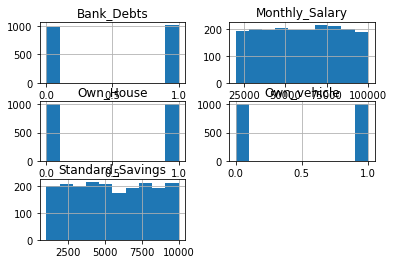

In [45]:
data.hist()

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
x_scale = StandardScaler().fit_transform(data)

In [162]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_scale)

In [160]:
x_scale[:10]

array([[-0.9990005 ,  0.998002  ,  0.2660302 , -0.57052914,  0.98807114],
       [-0.9990005 , -1.002002  ,  0.19680363,  0.61251355,  0.98807114],
       [ 1.0010005 ,  0.998002  , -1.41230808,  0.06947128,  0.98807114],
       [-0.9990005 , -1.002002  , -1.69127755,  0.32048941, -1.01207287],
       [-0.9990005 , -1.002002  ,  0.31875126,  1.69246635, -1.01207287],
       [ 1.0010005 ,  0.998002  ,  0.65373412, -0.87558323, -1.01207287],
       [-0.9990005 ,  0.998002  ,  1.57207265, -0.30954693,  0.98807114],
       [ 1.0010005 , -1.002002  ,  1.10478232, -0.03936712,  0.98807114],
       [-0.9990005 ,  0.998002  ,  1.5598691 , -1.23582299, -1.01207287],
       [ 1.0010005 , -1.002002  , -0.54778805, -0.71194241,  0.98807114]])

In [161]:
pd.Series(kmeans.labels_).to_csv('predict42.csv')

In [139]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2).fit(x_scale)

In [140]:
gr = pd.Series(clustering.labels_)

In [147]:
X = gr.replace(1,0)

In [155]:
X = X.replace(7,3)

In [157]:
X.to_csv('pred.csv')

0    0
1    0
2    1
3    1
4    1
dtype: int64

In [163]:
#####################################################3

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
x_min = MinMaxScaler().fit_transform(data)

In [167]:
minmax = KMeans(n_clusters=4, random_state=0).fit(x_min)

In [171]:
pd.Series(minmax.labels_).to_csv('pred.csv')

In [172]:
############################

In [179]:
from sklearn.model_selection import GridSearchCV
def grid_cv(model,X_train,param_grid):
    grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring='r2',verbose=1,cv=5, n_jobs=-1)
    grid_result = grid.fit(X_train)
    #print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

In [180]:
param_grid = {'init':['k-means++','random'],
              'n_init':[10,20,30,40,50],
              'max_iter':[10,100,150,200,250],
              'precompute_distances':['auto',True,False],
              'random_state':[0,42]}

In [181]:
grid_cv(minmax,x_min,param_grid)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


TypeError: _score() missing 1 required positional argument: 'y_true'

In [183]:
minmax.inertia_

829.5362948034364

In [184]:
###################################################

In [186]:
from sklearn.decomposition import PCA

In [188]:
x_pca = PCA(n_components=2).fit_transform(x_scale)

In [191]:
pca = KMeans(n_clusters=4, random_state=0).fit(x_pca)

In [194]:
pca.cluster_centers_

array([[ 1.26705781, -0.16775526],
       [-1.21604546,  0.16150458],
       [ 0.20355007,  1.11941929],
       [-0.13502822, -1.16572413]])

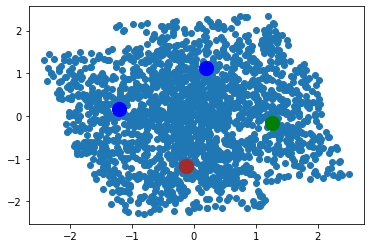

In [199]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.scatter(pca.cluster_centers_[0][0], pca.cluster_centers_[0][1], s=200, color='green')
plt.scatter(pca.cluster_centers_[1][0], pca.cluster_centers_[1][1], s=200, color='blue')
plt.scatter(pca.cluster_centers_[2][0], pca.cluster_centers_[2][1], s=200, color='BLUE')
plt.scatter(pca.cluster_centers_[3][0], pca.cluster_centers_[3][1], s=200, color='BROWN')

In [202]:
pd.Series(pca.predict(x_pca)).to_csv('pca.csv')

In [203]:
#################

In [204]:
x_pca_2= PCA(n_components=2).fit_transform(data)

In [213]:
xxp = StandardScaler().fit_transform(x_pca_2)

In [215]:
pcaX = KMeans(n_clusters=4, random_state=0).fit(xxp)

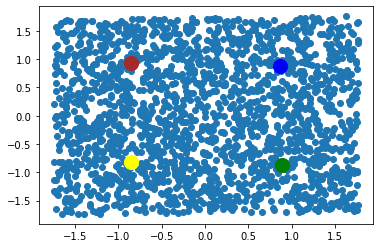

In [216]:
plt.scatter(xxp[:,0],xxp[:,1])
plt.scatter(pcaX.cluster_centers_[0][0], pcaX.cluster_centers_[0][1], s=200, color='green')
plt.scatter(pcaX.cluster_centers_[1][0], pcaX.cluster_centers_[1][1], s=200, color='blue')
plt.scatter(pcaX.cluster_centers_[2][0], pcaX.cluster_centers_[2][1], s=200, color='yellow')
plt.scatter(pcaX.cluster_centers_[3][0], pcaX.cluster_centers_[3][1], s=200, color='BROWN')

In [218]:
pcaX.inertia_

984.0119359722024

In [219]:
pd.Series(pcaX.labels_).to_csv('ssdpluspca.csv')